# Grids and ticks

This section demonstrates options available for axes grids and ticks.

## Setup

Import packages:

In [1]:
import fivecentplots as fcp
import numpy as np
import pandas as pd
from pathlib import Path

Read some dummy data for examples:

In [2]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data.csv')
df.head()

,Substrate,Target Wavelength,Boost Level,Temperature [C],Die,Voltage,I Set,I [A]
0,Si,450,0.2,25,"(1,1)",0.0,0.0,0.0
1,Si,450,0.2,25,"(1,1)",0.1,0.0,0.0
2,Si,450,0.2,25,"(1,1)",0.2,0.0,0.0
3,Si,450,0.2,25,"(1,1)",0.3,0.0,0.0
4,Si,450,0.2,25,"(1,1)",0.4,0.0,0.0


Optionally set the design theme (skipping here and using default):

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

## Grids

Grid properties apply to a specific axis: 

* major vs. minor
* ``x`` vs. ``x2`` vs. ``y`` vs. ``y2``

**fivecentplots** allows you to adjust all major and all minor grids together (using `grid_major_` as a keyword prefix) or to adjust only a specific axis (using `grid_major_<x|y|x2|y2>_` as a keyword prefix).

### Major grid

By default, only major gridlines for the <i>primary</i> axes are visible in a plot.  Notice below that the secondary y-axis has tick marks only.

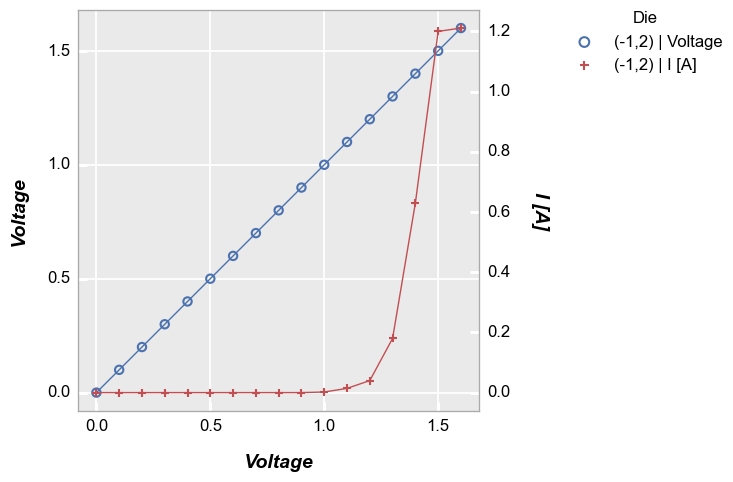

In [4]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die', 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

We can disable both primary gridlines using the `grid_major` keyword:

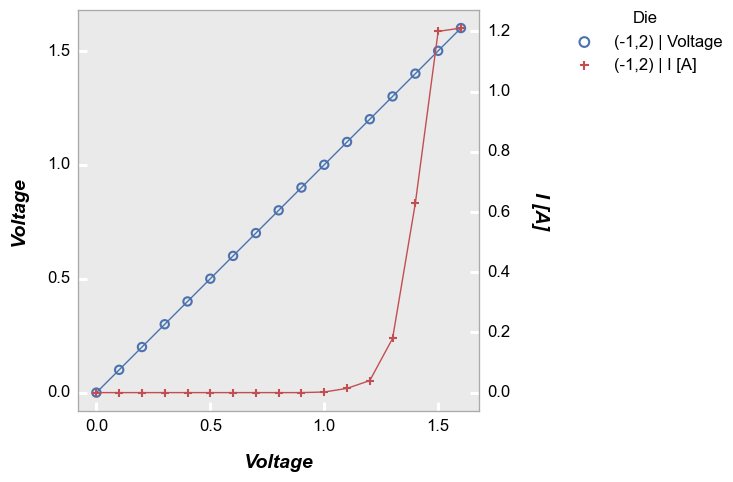

In [5]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         grid_major=False)

Or we can just disable one gridline by specifying the axis of interest in our keyword:

    - grid_major_y


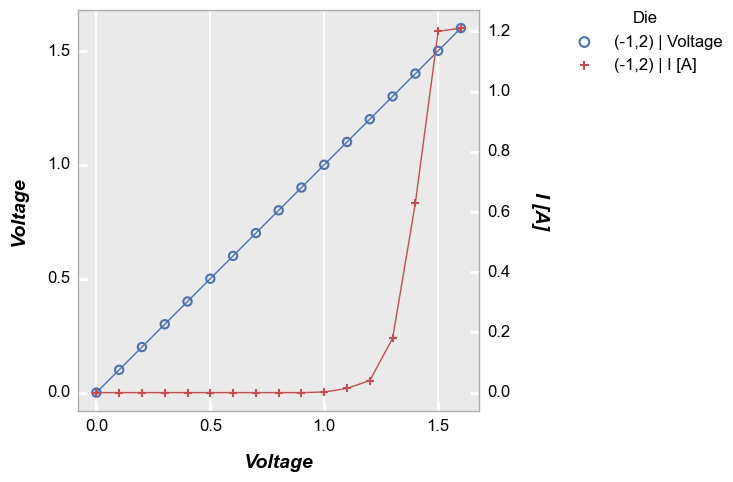

In [6]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         grid_major_y=False)

We can also turn on the secondary y-axis grid and give it a distinct look:

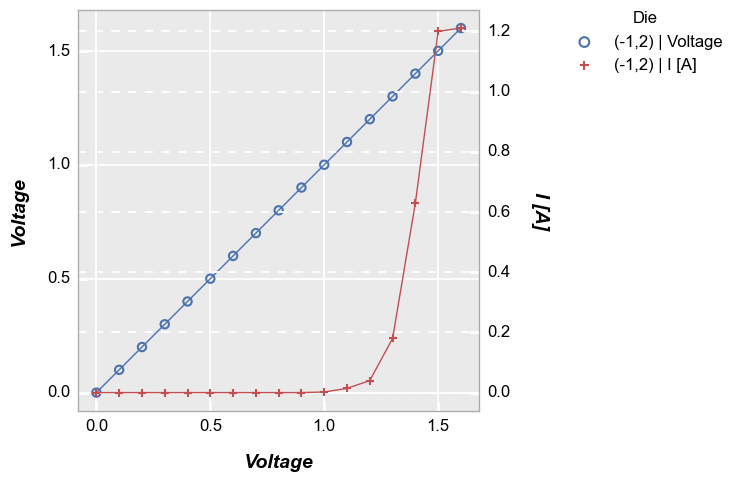

In [7]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         grid_major_y2=True, grid_major_y2_style='--')

We can also customize the gridline color and style (albeit in a truly awful way here):

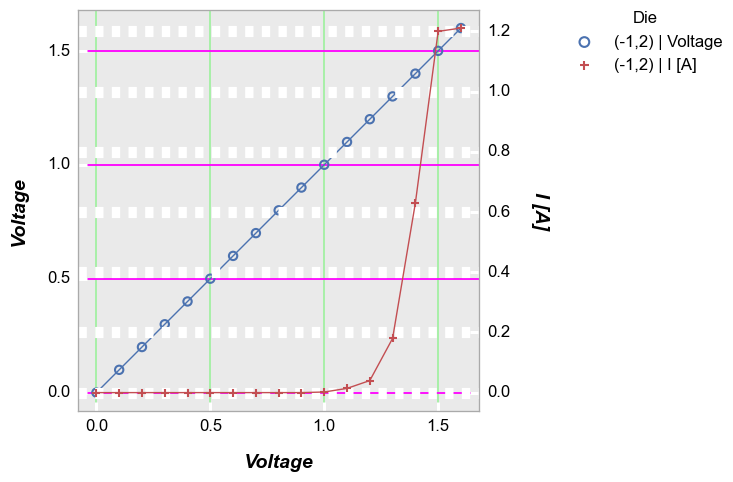

In [8]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         grid_major_y2=True, grid_major_y2_style='--', grid_major_y2_width=8,
         grid_major_x_color='#00FF00', grid_major_x_alpha=0.3, grid_major_y_color='#FF00FF')

### Minor grid

Minor grids are disabled by default but can be turned on and styled using either the `grid_minor_` family of keywords to adjust all primary axes, or the `grid_minor_<x|y|x2|y2_>` family of keywords to change a single axis.

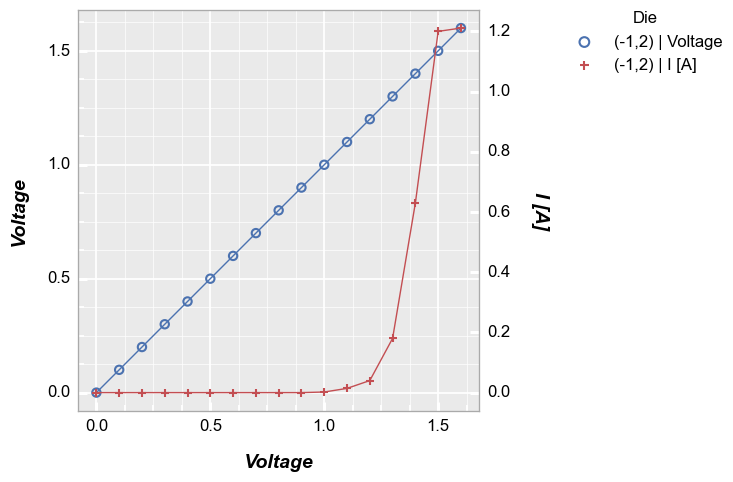

In [9]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         grid_minor=True)

## Tick marks

### Visibility

Tick marks are controlled by keywords with the prefix `ticks_major_` or `ticks_minor_` and, like grid lines, can be controlled as one for major and minor ticks or by specific axis.  They are enabled by default on the inside of the plot whenever a grid line is enabled.  However, you can enable tick marks without enabling the accompanying grid lines:

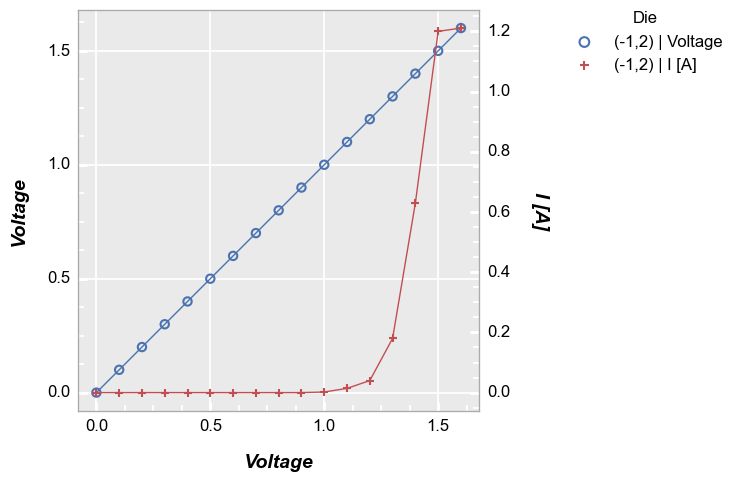

In [10]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ticks_minor=True)

### Tick Style

All tick mark parameters can be changed via keywords at the time of plot execution or on a more permanent basis via the theme file.  Consider the option below:

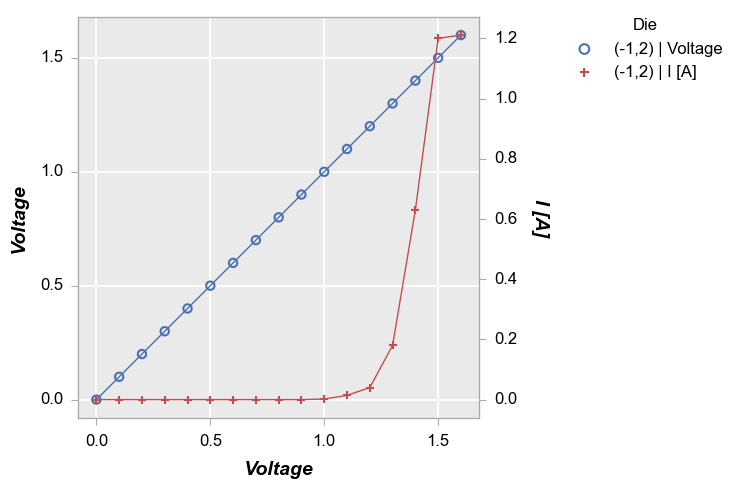

In [11]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ticks_major_direction='out', ticks_major_color='#aaaaaa', ticks_major_length=5, ticks_major_width=0.8)

### Tick increment

For major tick marks, instead of specifying a number of tick marks to display we specify the tick *increment*:

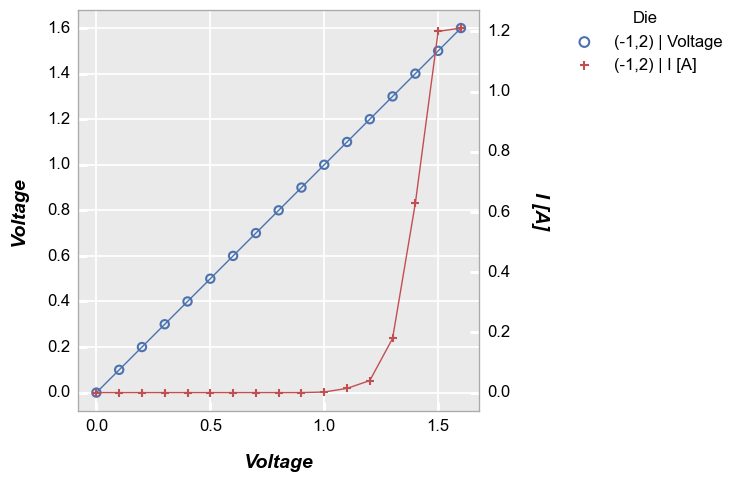

In [12]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ticks_major_y_increment=0.2)

For minor ticks however, it is easier to specify the *number* of minor ticks to use via the `ticks_minor_<x|y|x2|y2>_number` keyword.  The interval between minor ticks will then be calculated automatically. Setting the number of ticks automatically turns on the tick marks without explicitly setting `ticks_minor_<x|y|x2|y2>=True`.  

.. note:: This option only works for linearly scaled axis.  Minor log axis will always have 8 minor ticks with log spacing (notice the `number` is ignored for the "y2" axis below).

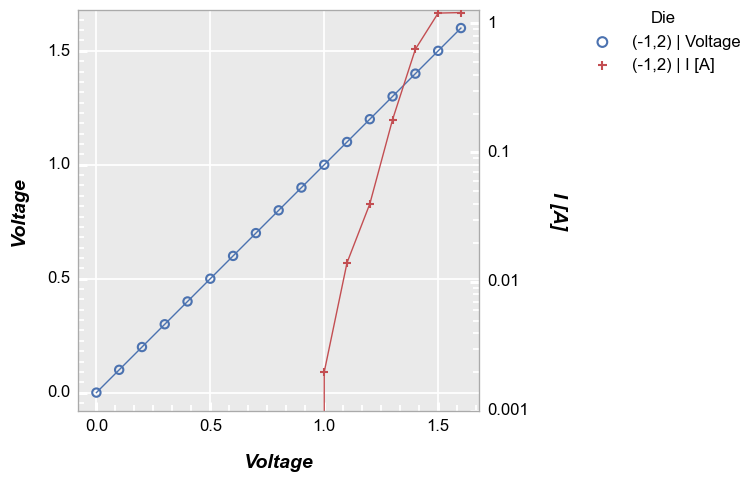

In [13]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die', ax2_scale='logy',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ticks_minor_x_number=5, ticks_minor_y_number=10, ticks_minor_y2_number=4)

## Tick labels

### General comments

In addition to tick markers, we can control the labels associated with those markers for both major and minor axes. Be aware of the following:

* Tick marks are automatically enabled if tick labels are enabled
* Tick labels are not automatically enabled when tick marks are enabled, but they are automatically disabled if tick marks are disabled
* Major tick labels are always on by default unless shut off intentionally
* Minor tick labels are always off by default and must be turned on intentionally

<b>Turn off all ticks</b><br>
(Notice the labels are not affected since they are independent ``Element`` objects)

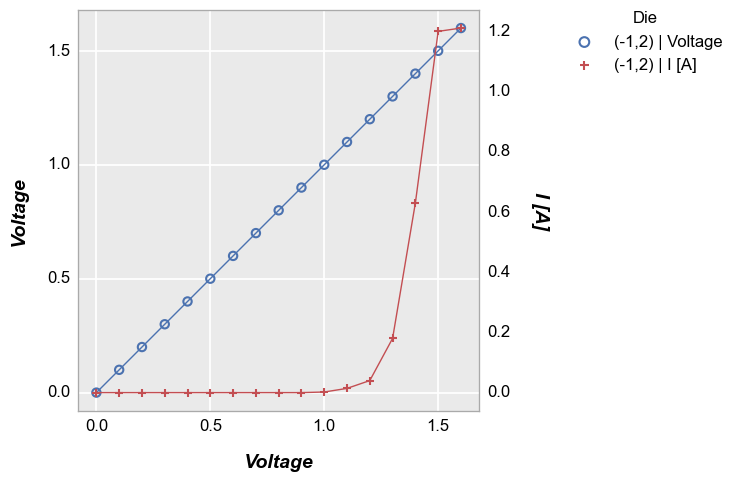

In [14]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ticks_major=False)

<b>Turn on minor ticks</b><br>
This is done using the `tick_labels_minor` family of keywords:

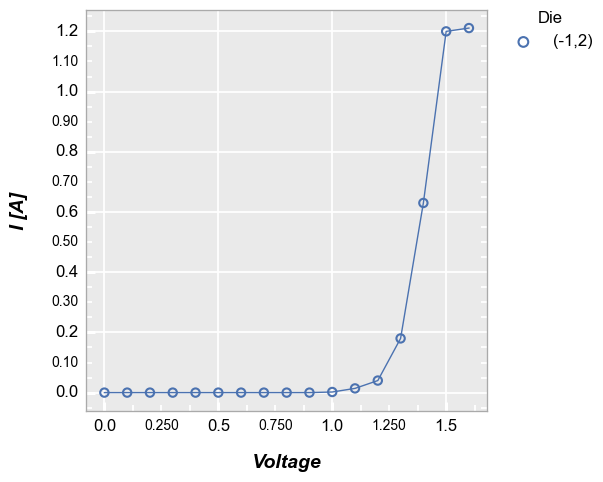

In [15]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         tick_labels_minor=True)

### Tick cleanup

One challenge with tick labels is the potential for label to label overlap depending on the number of ticks displayed and the size of the plot.  **fivecentplots** employs algorithms that looks for tick label collision problems within a plot and between subplots and throws out certain labels while leaving the actual tick mark intact.  Consider the following example:

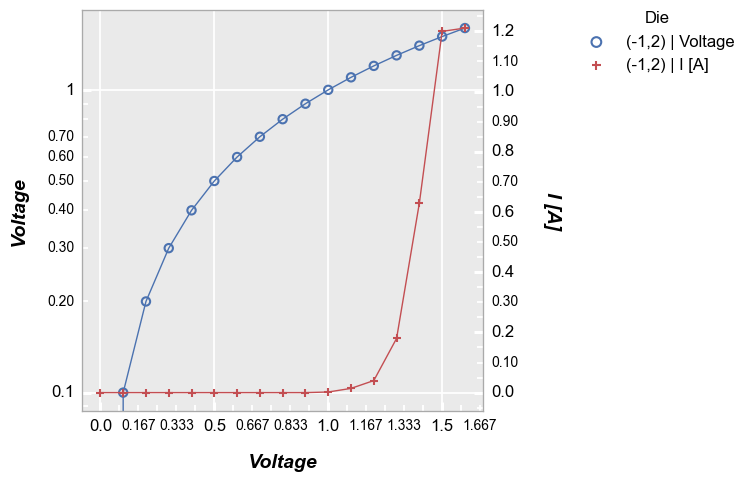

In [16]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         tick_labels_minor=True, ax_scale='logy', ax2_scale='lin', ticks_minor_x_number=5)

Notice that all tick marks are present, but not all tick marks have labels.  For instance, the x-axis has 5 ticks as specified by `ticks_minor_x_number=5`, but only the 2nd and 4th tick labels are displayed.  This is the result of tick cleanup.  We can disable the cleanup algorithm by setting the keyword `tick_cleanup=False`.  However, this may produce an undesirable result:

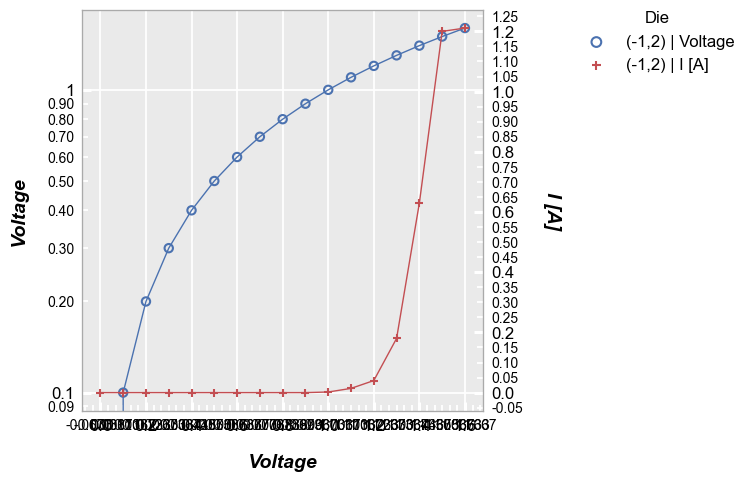

In [17]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         tick_labels_minor=True, ax_scale='logy', ax2_scale='lin', ticks_minor_x_number=5, tick_cleanup=False)

To fit more tick labels in, try increasing the axes size, rotating the tick labels (if applicable), and/or changing font sizes:

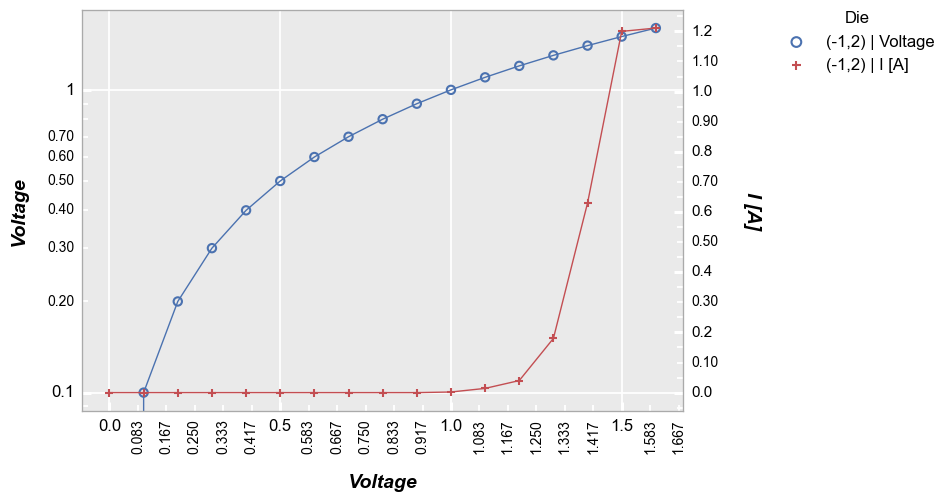

In [18]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         tick_labels_minor=True, ax_scale='logy', ax2_scale='lin', ticks_minor_x_number=5,
         ax_size=[600,400], tick_labels_minor_x_rotation=90, tick_labels_major_y2_font_size=11)  

### Scientific notation

#### Linear scale axis

**fivecentplots** will attempt to make an intelligent decision about how to display tick labels when the range of data and/or the discrete tick values are very small/large.  Consider the following example with very small `y` values.  Notice that the values on the y-axis default to exponential notation rather than explicitly writing out 18 zeros after the decimal place.

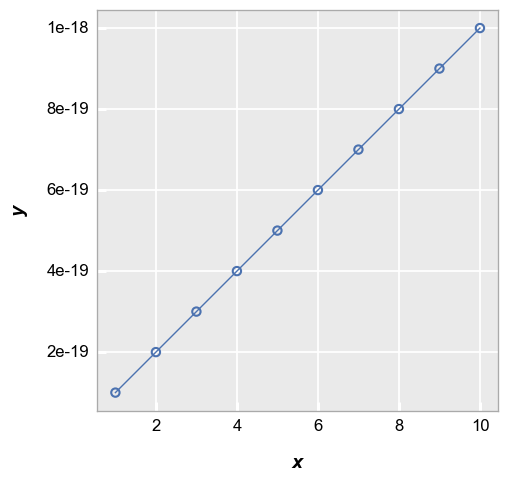

In [19]:
x = np.linspace(1, 10, 10)
y = np.linspace(1E-19, 1E-18, 10)
fcp.plot(pd.DataFrame({'x': x, 'y': y}), x='x', y='y')

Similarly, for very large values:

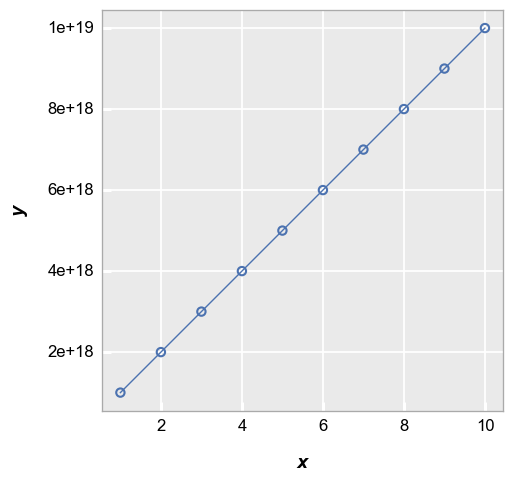

In [20]:
x = np.linspace(1, 10, 10)
y = np.linspace(1E18, 1E19, 10)
fcp.plot(pd.DataFrame({'x': x, 'y': y}), x='x', y='y')

You can disable the auto-formatting of ticks by setting the keywords `sci_x` and/or `sci_y` to `False`: 

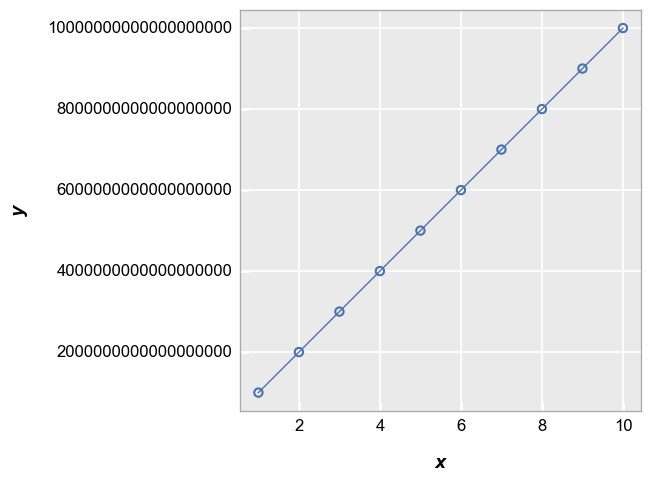

In [21]:
x = np.linspace(1, 10, 10)
y = np.linspace(1E18, 1E19, 10)
fcp.plot(pd.DataFrame({'x': x, 'y': y}), x='x', y='y', sci_y=False)

#### Log scale axis

Now consider the following log-scaled plot.  By default, the major tick labels for a log axis are powers of 10 if the values are large.

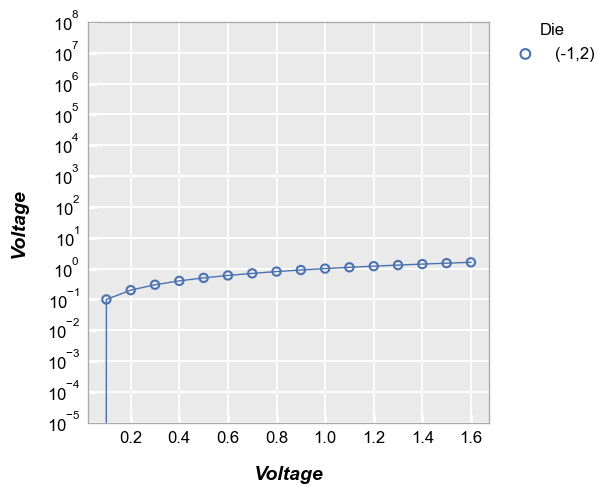

In [22]:
fcp.plot(df, x='Voltage', y='Voltage', legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ax_scale='logy', ymin=0.00001, ymax=100000000)

We can force the tick values to regular numerals as we did above by setting the keywords `sci_x` and/or `sci_y` to `False`. 

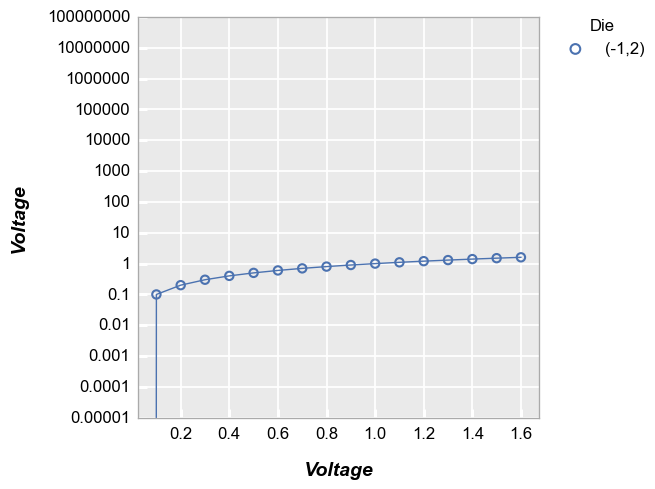

In [23]:
fcp.plot(df, x='Voltage', y='Voltage', legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ax_scale='logy', ymin=0.00001, ymax=100000000, sci_y=False)

We can force tick marks of a log-scaled axis to exponential notation by setting the keywords `sci_x` and/or `sci_y` to `True`.

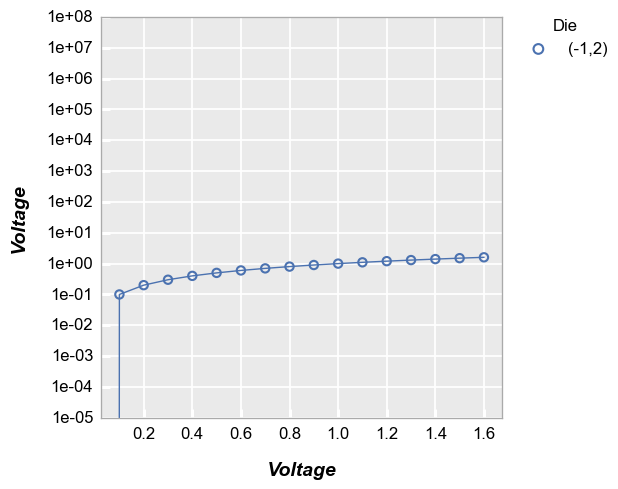

In [24]:
fcp.plot(df, x='Voltage', y='Voltage', legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ax_scale='logy', ymin=0.00001, ymax=100000000, sci_y=True)

#### Colorbar

We can also force scientific notation on the color bar axis by setting the kwargs `sci_z=True`:

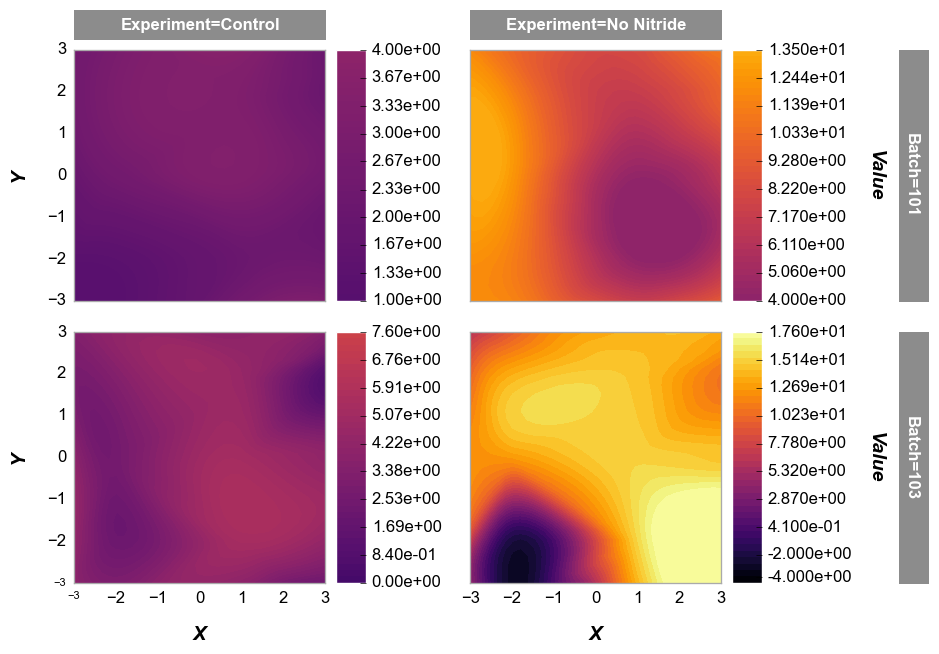

In [25]:
df2 = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_contour.csv')
fcp.contour(df2, x='X', y='Y', z='Value', row='Batch', col='Experiment', filled=True,
            cbar=True, xmin=-3, xmax=3, ymin=-3, ymax=3, ax_size=[250,250], 
            label_rc_font_size=12, levels=40, sci_z=True)